In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import SelectFromModel

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Belajar analisis data w python/project min-2 februari 2025/Heart Attack in youth vs Adult in South Africa/heart_attack_south_africa.csv')
df

,Patient_ID,Age,Gender,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Smoking_Status,Alcohol_Intake,Physical_Activity,Obesity_Index,Diabetes_Status,Family_History_Heart_Disease,Diet_Quality,Stress_Level,Heart_Attack_History,Medication_Usage,Triglycerides_Level,LDL_Level,HDL_Level,Heart_Attack_Outcome
0,1,76,Female,156,94,79,No,High,Sedentary,35.2,No,No,Good,High,No,No,264,141,65,0
1,2,39,Female,160,185,88,No,Low,Sedentary,21.3,No,No,Average,Medium,No,Yes,150,81,42,0
2,3,85,Male,254,173,113,Yes,Moderate,Highly Active,32.0,Yes,No,Good,Low,No,No,220,124,70,1
3,4,45,Female,261,187,65,No,High,Sedentary,36.4,No,Yes,Average,Low,No,Yes,141,56,38,1
4,5,48,Male,206,189,84,No,Low,Active,26.6,No,No,Good,High,No,No,221,186,26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,55,Female,187,159,88,Yes,Moderate,Sedentary,32.9,No,No,Average,High,No,Yes,225,158,48,1
99996,99997,84,Male,172,169,86,Yes,Low,Active,24.0,No,No,Poor,Medium,No,No,159,110,24,1
99997,99998,67,Female,299,134,90,No,Low,Active,32.4,Yes,Yes,Average,Low,Yes,No,219,141,22,1
99998,99999,33,Male,221,160,99,No,High,Active,39.1,No,Yes,Average,High,No,Yes,131,191,61,1


##1. Data Understanding

In [ ]:
print('data shape :', df.shape)

#terdapat 100000 baris data dan 20 kolom feature

data shape : (100000, 20)


In [ ]:
df.head()

,Patient_ID,Age,Gender,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Smoking_Status,Alcohol_Intake,Physical_Activity,Obesity_Index,Diabetes_Status,Family_History_Heart_Disease,Diet_Quality,Stress_Level,Heart_Attack_History,Medication_Usage,Triglycerides_Level,LDL_Level,HDL_Level,Heart_Attack_Outcome
0,1,76,Female,156,94,79,No,High,Sedentary,35.2,No,No,Good,High,No,No,264,141,65,0
1,2,39,Female,160,185,88,No,Low,Sedentary,21.3,No,No,Average,Medium,No,Yes,150,81,42,0
2,3,85,Male,254,173,113,Yes,Moderate,Highly Active,32.0,Yes,No,Good,Low,No,No,220,124,70,1
3,4,45,Female,261,187,65,No,High,Sedentary,36.4,No,Yes,Average,Low,No,Yes,141,56,38,1
4,5,48,Male,206,189,84,No,Low,Active,26.6,No,No,Good,High,No,No,221,186,26,0


Dari data di atas ada beberapa yang akan kita muat menjadi 0 dan 1.
1. Smoking_Status
2. Alcohol_Intake
3. Physical_Activity
4. Diabetes_Status
5. Family_History_Heart_Disease
6. Diet_Quality
7. Stress_Level
8. Heart_Attack_History
9. Medication_Usage

10. Gender

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Patient_ID                    100000 non-null  int64  
 1   Age                           100000 non-null  int64  
 2   Gender                        100000 non-null  object 
 3   Cholesterol_Level             100000 non-null  int64  
 4   Blood_Pressure_Systolic       100000 non-null  int64  
 5   Blood_Pressure_Diastolic      100000 non-null  int64  
 6   Smoking_Status                100000 non-null  object 
 7   Alcohol_Intake                100000 non-null  object 
 8   Physical_Activity             100000 non-null  object 
 9   Obesity_Index                 100000 non-null  float64
 10  Diabetes_Status               100000 non-null  object 
 11  Family_History_Heart_Disease  100000 non-null  object 
 12  Diet_Quality                  100000 non-null

In [ ]:
df.describe()

,Patient_ID,Age,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Obesity_Index,Triglycerides_Level,LDL_Level,HDL_Level,Heart_Attack_Outcome
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,56.929210,224.578740,144.317750,89.591950,29.004788,174.629860,124.333400,49.547090,0.587320
std,28867.657797,18.776713,43.316257,31.759636,17.277238,6.343317,72.118654,43.340624,17.350927,0.492319
min,1.000000,25.000000,150.000000,90.000000,60.000000,18.000000,50.000000,50.000000,20.000000,0.000000
25%,25000.750000,41.000000,187.000000,117.000000,75.000000,23.500000,112.000000,87.000000,35.000000,0.000000
50%,50000.500000,57.000000,225.000000,144.000000,90.000000,29.000000,175.000000,124.000000,50.000000,1.000000
75%,75000.250000,73.000000,262.000000,172.000000,105.000000,34.500000,237.000000,162.000000,65.000000,1.000000
max,100000.000000,89.000000,299.000000,199.000000,119.000000,40.000000,299.000000,199.000000,79.000000,1.000000


In [ ]:
print(df['Heart_Attack_Outcome'].value_counts())


Heart_Attack_Outcome
1    58732
0    41268
Name: count, dtype: int64


##2. Data Cleaning

In [ ]:
print("\nMissing values per fitur:")
print(df.isnull().sum())


Missing values per fitur:
Patient_ID                      0
Age                             0
Gender                          0
Cholesterol_Level               0
Blood_Pressure_Systolic         0
Blood_Pressure_Diastolic        0
Smoking_Status                  0
Alcohol_Intake                  0
Physical_Activity               0
Obesity_Index                   0
Diabetes_Status                 0
Family_History_Heart_Disease    0
Diet_Quality                    0
Stress_Level                    0
Heart_Attack_History            0
Medication_Usage                0
Triglycerides_Level             0
LDL_Level                       0
HDL_Level                       0
Heart_Attack_Outcome            0
dtype: int64


In [ ]:
# Cek data duplikat
print(df.duplicated().sum())

0


In [ ]:
# Hapus kolom 'Patient_ID' secara permanen
df.drop(columns=['Patient_ID'], inplace=True)

print(df.head())

   Age  Gender  Cholesterol_Level  Blood_Pressure_Systolic  \
0   76  Female                156                       94   
1   39  Female                160                      185   
2   85    Male                254                      173   
3   45  Female                261                      187   
4   48    Male                206                      189   

   Blood_Pressure_Diastolic Smoking_Status Alcohol_Intake Physical_Activity  \
0                        79             No           High         Sedentary   
1                        88             No            Low         Sedentary   
2                       113            Yes       Moderate     Highly Active   
3                        65             No           High         Sedentary   
4                        84             No            Low            Active   

   Obesity_Index Diabetes_Status Family_History_Heart_Disease Diet_Quality  \
0           35.2              No                           No         Good

##3. Exploratory Data Analysis(EDA)

###1. Cek data outlier

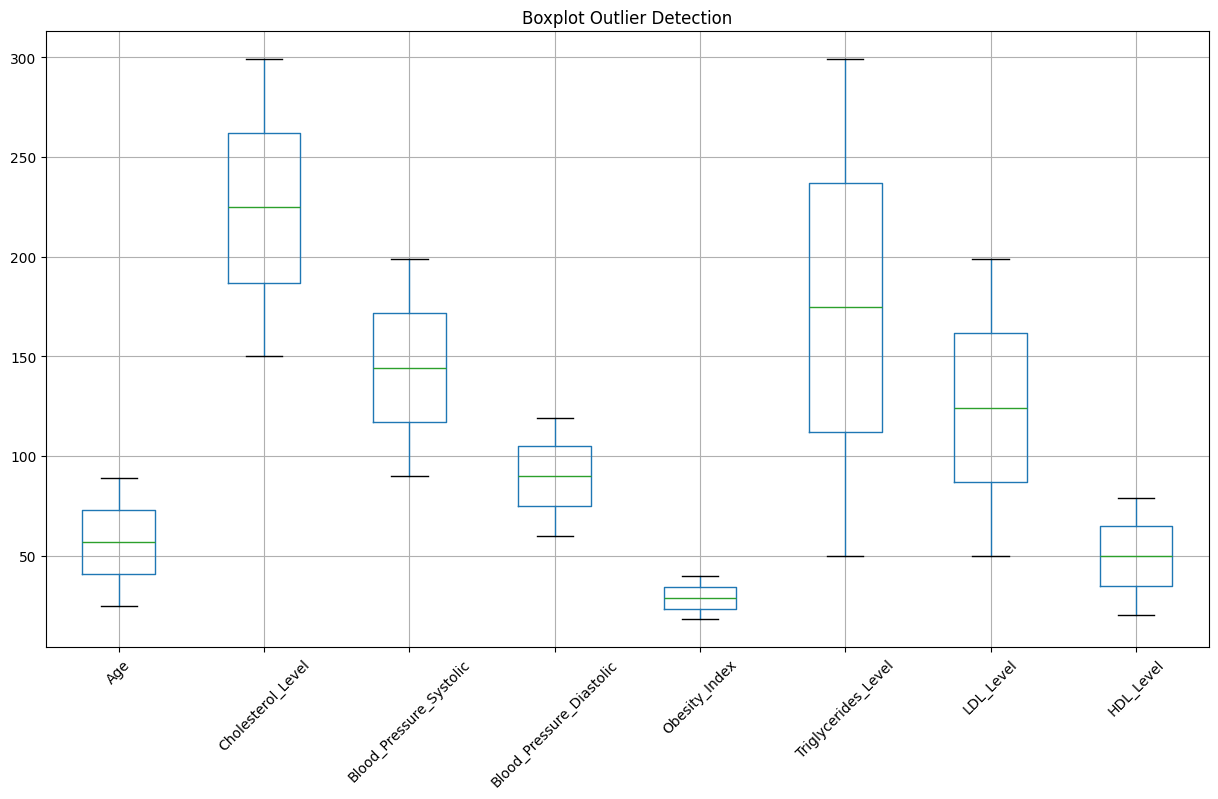

In [ ]:
# Fitur numerik yang akan dicek outlier
num_features = ["Age", "Cholesterol_Level", "Blood_Pressure_Systolic",
                "Blood_Pressure_Diastolic", "Obesity_Index",
                "Triglycerides_Level", "LDL_Level", "HDL_Level"]

plt.figure(figsize=(15, 8))
df[num_features].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot Outlier Detection")
plt.show()


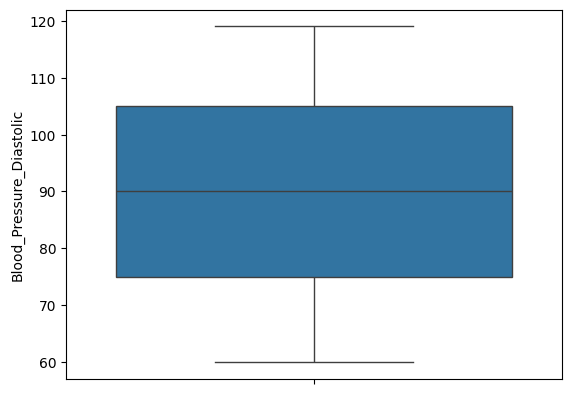

In [ ]:
# Boxplot satu persatu feature
sns.boxplot(df['Blood_Pressure_Diastolic'])
plt.show()

In [ ]:
# Deteksi outlier menggunakan IQR
Q1 = df[num_features].quantile(0.25)
Q3 = df[num_features].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cek jumlah outlier di tiap fitur
outliers = ((df[num_features] < lower_bound) | (df[num_features] > upper_bound)).sum()
print("Jumlah outlier per fitur:\n", outliers)


Jumlah outlier per fitur:
 Age                         0
Cholesterol_Level           0
Blood_Pressure_Systolic     0
Blood_Pressure_Diastolic    0
Obesity_Index               0
Triglycerides_Level         0
LDL_Level                   0
HDL_Level                   0
dtype: int64


Dari semua di atas kesimpulannya bahwa tidak memiliki outlier

###2. Cek Distribusi Fitur

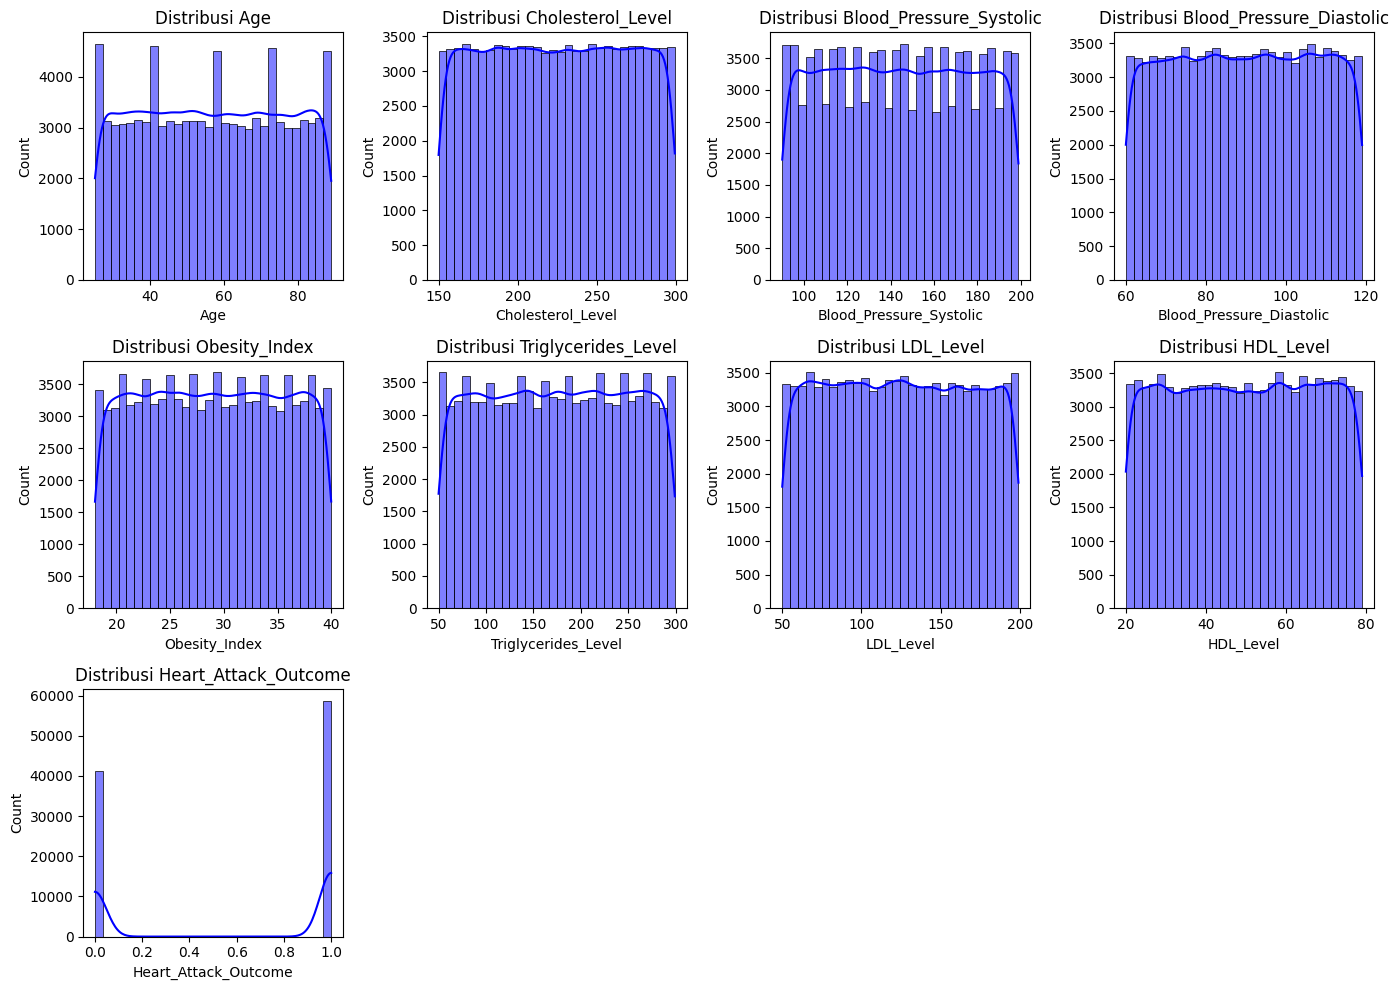

In [ ]:
# Distribusi fitur numerik
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

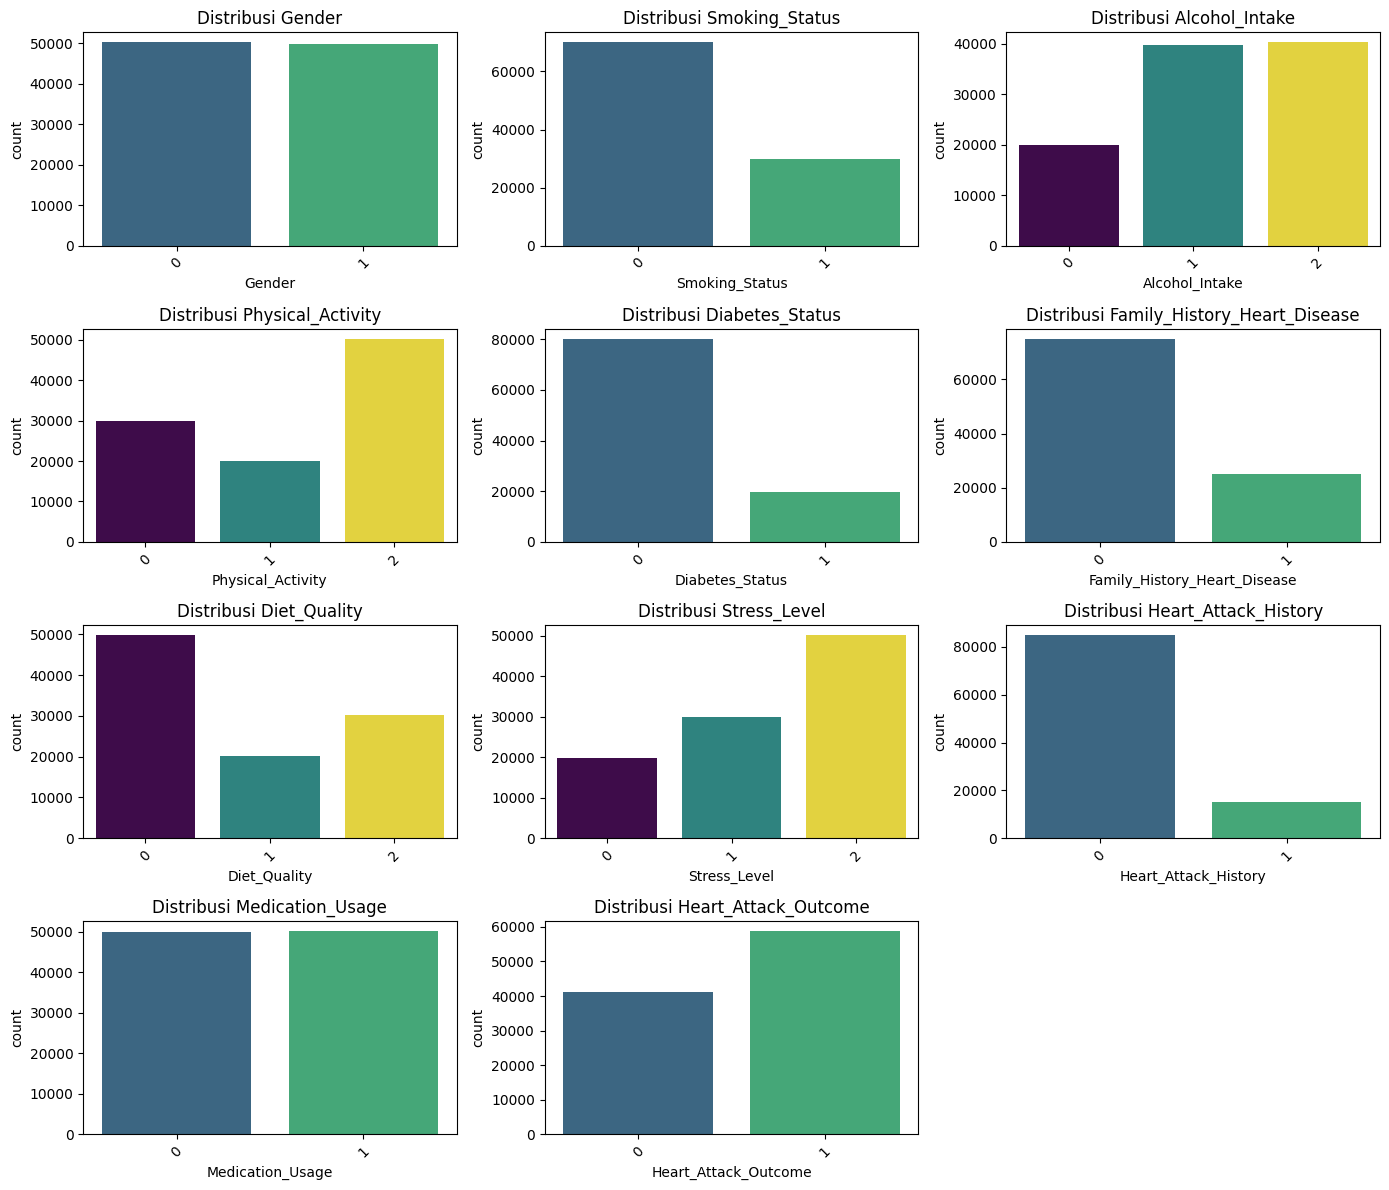

In [41]:
# Distribusi fitur kategorikal Grafik ini memperlihatkan frekuensi setiap kategori dalam fitur kategorikal, membantu untuk memahami seberapa sering masing-masing kategori muncul dalam dataset.
# Distribusi fitur kategorikal
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ["Gender", "Smoking_Status", "Alcohol_Intake", "Physical_Activity",
                    "Diabetes_Status", "Family_History_Heart_Disease", "Diet_Quality", "Stress_Level",
                    "Heart_Attack_History", "Medication_Usage", "Heart_Attack_Outcome"]

plt.figure(figsize=(14, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(4, 3, i+1)
    sns.countplot(x=df[col], hue=df[col], palette="viridis", legend=False)  # Menambahkan hue dan legend=False
    plt.title(f"Distribusi {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###3. Cek korelasi antar fitur(heatmap)

Disni melakukan label encoder dulu agar heatmapnya akurat

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# List kolom kategorikal yang perlu di-encode
categorical_columns = ['Gender','Smoking_Status', 'Alcohol_Intake', 'Physical_Activity', 'Diabetes_Status', 'Family_History_Heart_Disease', 'Diet_Quality', 'Stress_Level', 'Heart_Attack_History', 'Medication_Usage']

# Encode kolom kategorikal
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,Age,Gender,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Smoking_Status,Alcohol_Intake,Physical_Activity,Obesity_Index,Diabetes_Status,Family_History_Heart_Disease,Diet_Quality,Stress_Level,Heart_Attack_History,Medication_Usage,Triglycerides_Level,LDL_Level,HDL_Level,Heart_Attack_Outcome
0,76,0,156,94,79,0,0,2,35.2,0,0,1,0,0,0,264,141,65,0
1,39,0,160,185,88,0,1,2,21.3,0,0,0,2,0,1,150,81,42,0
2,85,1,254,173,113,1,2,1,32.0,1,0,1,1,0,0,220,124,70,1
3,45,0,261,187,65,0,0,2,36.4,0,1,0,1,0,1,141,56,38,1
4,48,1,206,189,84,0,1,0,26.6,0,0,1,0,0,0,221,186,26,0


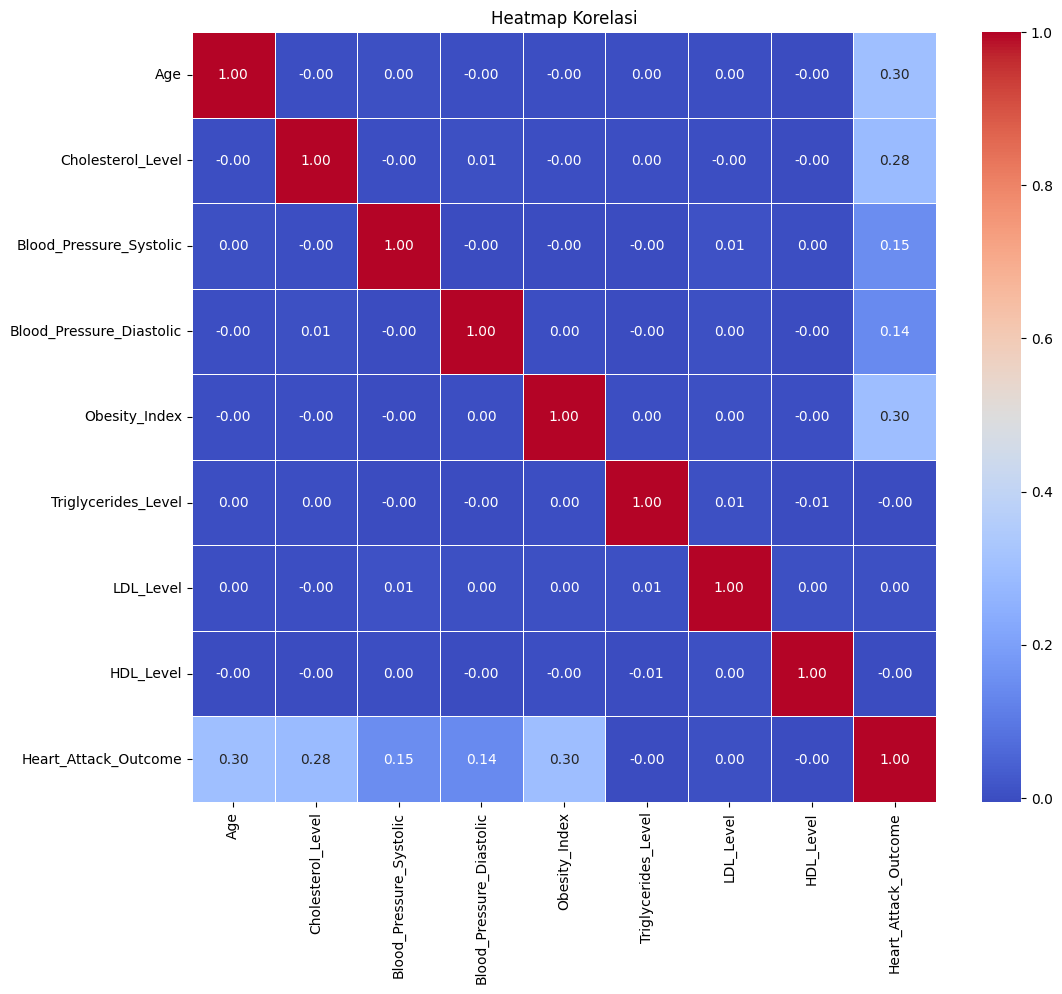

In [ ]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

In [ ]:
df.describe()

,Age,Gender,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Smoking_Status,Alcohol_Intake,Physical_Activity,Obesity_Index,Diabetes_Status,Family_History_Heart_Disease,Diet_Quality,Stress_Level,Heart_Attack_History,Medication_Usage,Triglycerides_Level,LDL_Level,HDL_Level,Heart_Attack_Outcome
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,56.929210,0.498200,224.578740,144.317750,89.591950,0.300110,1.202960,1.204650,29.004788,0.198450,0.250230,0.80270,1.302950,0.149770,0.500790,174.629860,124.333400,49.547090,0.587320
std,18.776713,0.499999,43.316257,31.759636,17.277238,0.458308,0.749061,0.871192,6.343317,0.398835,0.433148,0.87186,0.779998,0.356848,0.500002,72.118654,43.340624,17.350927,0.492319
min,25.000000,0.000000,150.000000,90.000000,60.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,50.000000,50.000000,20.000000,0.000000
25%,41.000000,0.000000,187.000000,117.000000,75.000000,0.000000,1.000000,0.000000,23.500000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,112.000000,87.000000,35.000000,0.000000
50%,57.000000,0.000000,225.000000,144.000000,90.000000,0.000000,1.000000,2.000000,29.000000,0.000000,0.000000,1.00000,2.000000,0.000000,1.000000,175.000000,124.000000,50.000000,1.000000
75%,73.000000,1.000000,262.000000,172.000000,105.000000,1.000000,2.000000,2.000000,34.500000,0.000000,1.000000,2.00000,2.000000,0.000000,1.000000,237.000000,162.000000,65.000000,1.000000
max,89.000000,1.000000,299.000000,199.000000,119.000000,1.000000,2.000000,2.000000,40.000000,1.000000,1.000000,2.00000,2.000000,1.000000,1.000000,299.000000,199.000000,79.000000,1.000000


###4. Feature Engineering

###1. Min-Max Scaler
Min-Max Scaler adalah salah satu metode normalisasi yang digunakan untuk mengubah skala fitur ke rentang tertentu, biasanya antara 0 dan 1. Ini berguna untuk memastikan bahwa semua fitur memiliki skala yang sama sehingga algoritma machine learning bisa bekerja lebih optimal.

oh iya, ini digunakan hanya untuk beberapa model tertentu seperti SVM. Kalau random forest, decision tree ini tidak diperlukan

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Pilih hanya fitur numerik yang perlu dinormalisasi (tidak termasuk fitur biner)
numerical_features = [
    "Age", "Cholesterol_Level", "Blood_Pressure_Systolic", "Blood_Pressure_Diastolic",
    "Physical_Activity", "Obesity_Index", "Triglycerides_Level", "LDL_Level", "HDL_Level"
]

df_scaled = df.copy()
df_scaled[numerical_features] = scaler.fit_transform(df[numerical_features])

print(df_scaled.head())

        Age  Gender  Cholesterol_Level  Blood_Pressure_Systolic  \
0  0.796875       0           0.040268                 0.036697   
1  0.218750       0           0.067114                 0.871560   
2  0.937500       1           0.697987                 0.761468   
3  0.312500       0           0.744966                 0.889908   
4  0.359375       1           0.375839                 0.908257   

   Blood_Pressure_Diastolic  Smoking_Status  Alcohol_Intake  \
0                  0.322034               0               0   
1                  0.474576               0               1   
2                  0.898305               1               2   
3                  0.084746               0               0   
4                  0.406780               0               1   

   Physical_Activity  Obesity_Index  Diabetes_Status  \
0                1.0       0.781818                0   
1                1.0       0.150000                0   
2                0.5       0.636364               

###2. Feature Selection

Menggunakan Embedded selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Heart_Attack_Outcome'])  # Semua fitur kecuali target
y = df['Heart_Attack_Outcome']

# Gunakan Random Forest untuk memilih fitur penting
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Ambil feature importance
feature_importances = model.feature_importances_
feature_names = X.columns

# Pilih fitur yang importance-nya lebih besar dari median
selector = SelectFromModel(model, threshold="median", prefit=True)
X_selected = selector.transform(X)


selected_features = X.columns[selector.get_support()]
print("Fitur yang dipilih:", list(selected_features))

Fitur yang dipilih: ['Age', 'Cholesterol_Level', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Smoking_Status', 'Obesity_Index', 'Diabetes_Status', 'Family_History_Heart_Disease', 'Triglycerides_Level']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


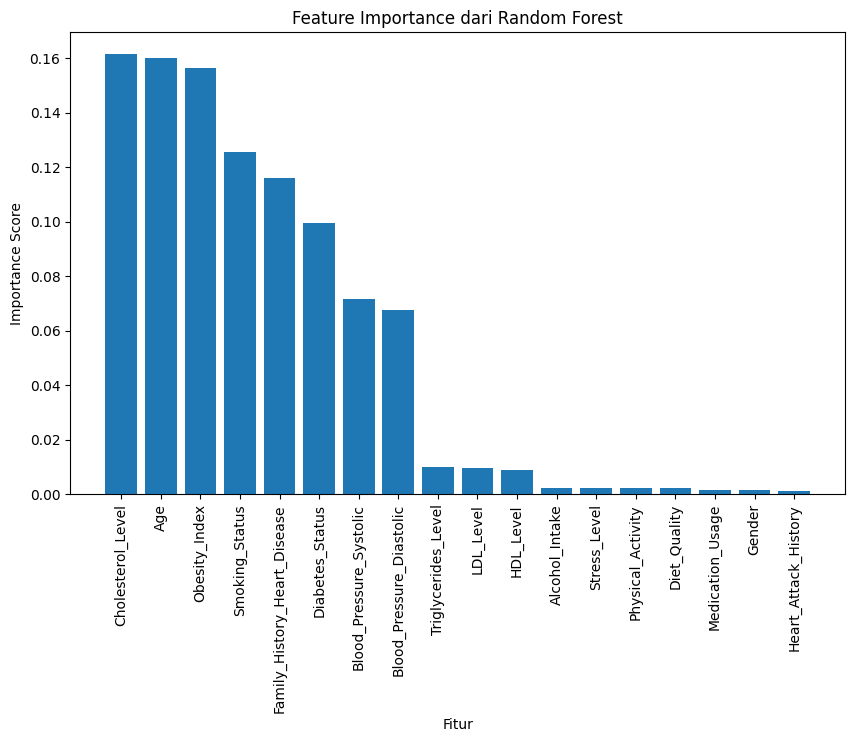

In [ ]:
# Visualisasi fitur penting
sorted_idx = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align="center")
plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_idx], rotation=90)
plt.xlabel("Fitur")
plt.ylabel("Importance Score")
plt.title("Feature Importance dari Random Forest")
plt.show()


#3. Modeling

In [ ]:
from sklearn.model_selection import train_test_split

# Split data jadi training & testing (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [ ]:
# Scaling (Hanya untuk model yang butuh)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
models = {
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree (DT)": DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42),
    "Random Forest (RF)": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "Support Vector Machine (SVM)": SVC(kernel='linear', probability=True),
    "Naive Bayes (NB)": GaussianNB()
}

###Evaluasi model

In [ ]:
# Evaluasi Model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results

In [ ]:
#Latih & Evaluasi Model
results = {}
for name, model in models.items():
    if name in ["K-Nearest Neighbors (KNN)", "Support Vector Machine (SVM)", "Naive Bayes (NB)"]:
        model.fit(X_train_scaled, y_train)
        results[name] = evaluate_model(model, X_test_scaled, y_test)
    else:
        model.fit(X_train, y_train)
        results[name] = evaluate_model(model, X_test, y_test)


In [ ]:
# Buat DataFrame untuk Ringkasan Hasil
summary_df = pd.DataFrame([
    {
        'Model': name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    }
    for name, metrics in results.items()
])

print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)   0.95105   0.957479  0.959511  0.958494
1            Decision Tree (DT)   0.99980   0.999745  0.999915  0.999830
2            Random Forest (RF)   0.92610   0.903122  0.979628  0.939821
3  Support Vector Machine (SVM)   0.87225   0.885251  0.899754  0.892444
4              Naive Bayes (NB)   0.81700   0.833074  0.862066  0.847322


In [ ]:
# cek overfitting pada decision tree karena paling tinggi
from sklearn.model_selection import cross_val_score

dt = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)
scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", scores.mean())

Cross-Validation Accuracy: 0.9998250000000001


In [ ]:
print(X_train.shape)  # Lihat jumlah fitur yang digunakan saat training

(80000, 9)


### Pengujian menggunakan data baru

In [ ]:

new_data = pd.DataFrame([{
    'Age': 60,
    'Cholesterol_Level': 220,
    'Blood_Pressure_Systolic': 130,
    'Blood_Pressure_Diastolic': 85,
    'Smoking_Status': 1,
    'Obesity_Index': 27,
    'Diabetes_Status': 0,
    'Family_History_Heart_Disease': 1,
    'Triglycerides_Level': 180
}])


In [ ]:
new_data = new_data[selected_features]
new_data_scaled = scaler.transform(new_data.to_numpy())  # Ubah ke numpy sebelum transform

In [ ]:
prediction = model.predict(new_data_scaled)  # Gunakan model yang sudah dilatih
print(f"Prediksi Risiko Serangan Jantung: {'Ya' if prediction[0] == 1 else 'Tidak'}")

Prediksi Risiko Serangan Jantung: Ya
